In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [9]:
X_train = np.loadtxt(r'C:\Users\vandh\OneDrive\Desktop\project\Image Classification CNN Keras Dataset\input.csv', delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\vandh\OneDrive\Desktop\project\Image Classification CNN Keras Dataset\labels.csv', delimiter = ',')

X_test = np.loadtxt(r'C:\Users\vandh\OneDrive\Desktop\project\Image Classification CNN Keras Dataset\input_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\vandh\OneDrive\Desktop\project\Image Classification CNN Keras Dataset\labels_test.csv', delimiter = ',')

In [14]:
X_train = X_train.reshape(len(X_train),100, 100, 3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100, 100, 3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
Y_train = Y_train/255.0

X_test = X_test/255.0
Y_test = Y_test/255.0


In [15]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of X_test:  (400, 100, 100, 3)


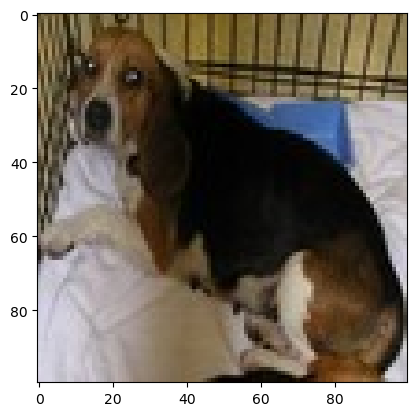

In [36]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

In [37]:
model = Sequential([
    Conv2D(32,(3,3), activation = "relu", input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = "relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(1, activation = "sigmoid")
])


In [38]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [39]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 13s 348ms/step - loss: 0.0435 - accuracy: 0.4865
Epoch 2/5
32/32 [==============================] - 12s 362ms/step - loss: 0.0155 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 12s 365ms/step - loss: 0.0144 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 12s 367ms/step - loss: 0.0142 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 11s 352ms/step - loss: 0.0140 - accuracy: 0.5000


In [40]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 59ms/step - loss: 0.0141 - accuracy: 0.5000


[0.014111177064478397, 0.5]

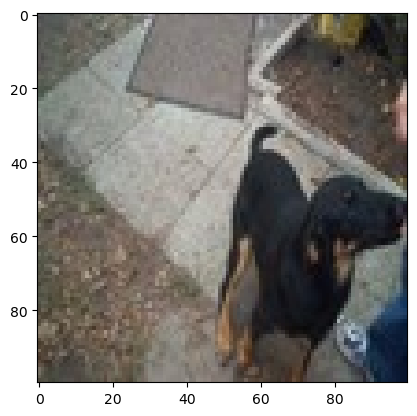

1/1 [==============================] - 0s 13ms/step
[[0.00289372]]


In [46]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

print(y_pred)